In [71]:
!pip install webcolors

In [30]:
# image processing
from PIL import Image

# data analysis
import math
import numpy as np
import pandas as pd

# visualization
import matplotlib.pyplot as plt
from importlib import reload

# modeling
from sklearn.cluster import KMeans

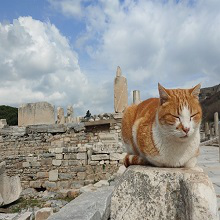

In [43]:
im = Image.open('cat.jpg')
im

In [32]:
pix = np.array(im)
cat_pixels = pix.reshape(*im.size, -1)
cat_pixels.shape

(220, 220, 3)

In [33]:
cat_pixels

array([[[ 94, 131, 183],
        [ 94, 131, 183],
        [ 94, 131, 183],
        ...,
        [175, 192, 208],
        [175, 192, 208],
        [174, 191, 207]],

       [[ 94, 131, 183],
        [ 94, 131, 183],
        [ 94, 131, 183],
        ...,
        [172, 189, 205],
        [172, 189, 205],
        [172, 189, 205]],

       [[ 94, 131, 183],
        [ 94, 131, 183],
        [ 94, 131, 183],
        ...,
        [170, 187, 203],
        [170, 187, 203],
        [170, 187, 203]],

       ...,

       [[175, 174, 170],
        [167, 166, 162],
        [198, 197, 193],
        ...,
        [198, 195, 186],
        [202, 199, 190],
        [172, 172, 164]],

       [[173, 173, 165],
        [182, 182, 174],
        [139, 139, 131],
        ...,
        [203, 201, 189],
        [205, 202, 193],
        [177, 174, 167]],

       [[101, 101,  91],
        [104, 104,  94],
        [148, 148, 138],
        ...,
        [206, 204, 192],
        [206, 203, 194],
        [176, 173, 166]]

In [34]:
#kmeans는 2차원 벡터를 파라미터로 받기 때문에 3차원 벡터를 2차원 벡터로 변환
cat_pixels = cat_pixels.reshape(48400, 3)

In [35]:
cat_pixels

array([[ 94, 131, 183],
       [ 94, 131, 183],
       [ 94, 131, 183],
       ...,
       [206, 204, 192],
       [206, 203, 194],
       [176, 173, 166]], dtype=uint8)

In [36]:
#이미지의 색상을 5개만 사용하기 위해 n_clusters를 5로 지정
kmeans = KMeans(n_clusters = 5,
                n_jobs = -1,
                random_state = 123).fit(cat_pixels)
#kmeans로 생성된 중심값 5개를 DataFrame으로 출력하여 결과 확인
kmeans_df = pd.DataFrame(kmeans.cluster_centers_, columns = ['Red', 'Green', 'Blue'])
kmeans_df

C:\Users\masterT\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


,Red,Green,Blue
0,145.376801,166.340474,190.840160
1,126.973606,109.570693,88.572007
2,187.211652,195.829399,201.237347
3,163.518247,154.974323,139.765425
4,68.282980,56.364124,41.075785


In [37]:
#5개의 레이블 리스트
kmeans.labels_

array([0, 0, 0, ..., 2, 2, 3])

In [38]:
#레이블에 해당하는 r,g,b값을 1차원 리스트로 저장한 뒤 reshape를 통해 기존의 3차원 벡터 크기인 (220, 220, 3)으로 수정
def replaceWithCentroid(kmeans):
    new_pixels = []
    for label in kmeans.labels_:
        pixel_as_centroid = list(kmeans.cluster_centers_[label])
        new_pixels.append(pixel_as_centroid)
    new_pixels = np.array(new_pixels).reshape(220, 220, 3)
    return new_pixels
new_pixels = replaceWithCentroid(kmeans)

In [39]:
print(np.array(new_pixels))

[[[145.3768007  166.34047351 190.84016034]
  [145.3768007  166.34047351 190.84016034]
  [145.3768007  166.34047351 190.84016034]
  ...
  [187.21165223 195.82939946 201.23734688]
  [187.21165223 195.82939946 201.23734688]
  [187.21165223 195.82939946 201.23734688]]

 [[145.3768007  166.34047351 190.84016034]
  [145.3768007  166.34047351 190.84016034]
  [145.3768007  166.34047351 190.84016034]
  ...
  [187.21165223 195.82939946 201.23734688]
  [187.21165223 195.82939946 201.23734688]
  [187.21165223 195.82939946 201.23734688]]

 [[145.3768007  166.34047351 190.84016034]
  [145.3768007  166.34047351 190.84016034]
  [145.3768007  166.34047351 190.84016034]
  ...
  [187.21165223 195.82939946 201.23734688]
  [187.21165223 195.82939946 201.23734688]
  [187.21165223 195.82939946 201.23734688]]

 ...

 [[145.3768007  166.34047351 190.84016034]
  [163.5182468  154.9743228  139.76542513]
  [187.21165223 195.82939946 201.23734688]
  ...
  [187.21165223 195.82939946 201.23734688]
  [187.21165223 19

In [40]:
#압축된 이미지 결과 리턴
def plotImage(img_array, size):
    reload(plt)
    plt.imshow(np.array(img_array/255).reshape(*size))
    plt.axis('off')
    return plt

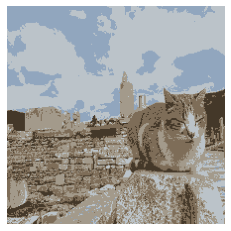

In [41]:
plotImage(new_pixels, new_pixels.shape).show()

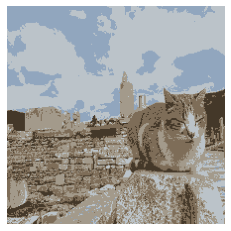

In [42]:
#5개의 색으로 군짐화 하여 변경한 이미지 저장
plotImage(new_pixels, new_pixels.shape).savefig('cat_kmeans')